# Proposal: Observational research on the rate of lung cancer among substance users

### Introduction

Lung cancer, the cancer with the highest number of cancer-related deaths worldwide, is thought to be strongly associated with tobacco, but as more research is conducted, more potential factors for lung cancer are being discovered, and one of them is the interaction between alcohol and tobacco consumption. (Brenner et al., 2019;2018;)The goal of this project is to analyze the correlation between lung cancer and substance use. Primarily, it is widely accepted that smoking contributes to the development of lung cancer far more than drinking. Research conducted in 2019 concerning the effects of smoking and drinking found that cancer risk increased by a bottle of wine per week for a lifetime is equivalent to 10 cigarettes consumed in just a week (Hydes et al., 2019). We will analyze if the study result applies to a statistical analysis of Cancer dataset. The dataset is a survey of lung cancer data collected from a website that operates a lung cancer prediction system. The dataset has 16 columns; each column is a measure to describe each patient’s symptoms, genetic conditions, or habits, such as drinking and smoking. The columns of interest are ‘Cancer,’ ‘Alcohol,’ and ‘Smoking.’ The parameter will be whether a lung cancer patient used to drink alcohol or smoke, and the difference in proportions of smokers and drinkers among the cancer patients will be the response variable.


### Preliminary results

In [1]:
# Add libraries
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Below is a raw dataset directly downloaded from the source. All variables are categorial, and most of them has truth value assigned. 

In [2]:
# Read data from .csv file
survey <- read.csv('survey lung cancer.csv')
head(survey)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC.DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL.CONSUMING,COUGHING,SHORTNESS.OF.BREATH,SWALLOWING.DIFFICULTY,CHEST.PAIN,LUNG_CANCER
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
2,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
3,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
4,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
5,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
6,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES


So, here below the table is once wrangled and organized by:
1. changing the truth value assignments to TRUE or FALSE
2. Subsetting columns of our interest

In [3]:
# Change most of the variables to boolean variables instead of integer or string variables
survey_2 <- survey %>%
    summarize(gender = GENDER,
              age = AGE,
              smoking = SMOKING - 1 == 1,
              yellow_fingers = YELLOW_FINGERS - 1 == 1,
              anxiety = ANXIETY - 1 == 1,
              chronic_disease = CHRONIC.DISEASE - 1 == 1,
              fatigue = FATIGUE - 1 == 1,
              allergy = ALLERGY - 1 == 1,
              wheezing = WHEEZING - 1 == 1,
              alcohol_consuming = ALCOHOL.CONSUMING - 1 == 1,
              coughing = COUGHING - 1 == 1,
              shortness_of_breath = SHORTNESS.OF.BREATH - 1 == 1,
              swallowing_difficulty = SWALLOWING.DIFFICULTY - 1 == 1,
              chest_pain = CHEST.PAIN - 1 == 1,
              lung_cancer = LUNG_CANCER == "YES"
             )
head(survey_2)

,gender,age,smoking,yellow_fingers,anxiety,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
,<chr>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,M,69,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
2,M,74,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
3,F,59,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE
4,M,63,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
5,F,63,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
6,F,75,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE


In [4]:
# Clean and wrangle data; we are only interested in people who have lung cancer and whether or not they smoked and/or consumed alcohol
survey_clean_wrangled <- survey_2 %>%
    filter(lung_cancer == TRUE) %>%
    select(gender, smoking, alcohol_consuming) %>%
    mutate(none = !smoking & !alcohol_consuming, both = smoking & alcohol_consuming)

head(survey_clean_wrangled)

,gender,smoking,alcohol_consuming,none,both
,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1,M,FALSE,TRUE,FALSE,FALSE
2,M,TRUE,FALSE,FALSE,FALSE
3,F,FALSE,FALSE,TRUE,FALSE
4,M,TRUE,TRUE,FALSE,TRUE
5,F,TRUE,FALSE,FALSE,FALSE
6,M,TRUE,TRUE,FALSE,TRUE


Below is a brief summarization of proportions of lung cancer patients among substance users.

In [5]:
# Summarize proportions of smokers, drinkers, people who did both, and people who did neither
survey_summary_clean_wrangled <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(none_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              smoking_prop = mean(smoking == TRUE & alcohol_consuming != TRUE),
              alcohol_consuming_prop = mean(alcohol_consuming == TRUE & smoking != TRUE),
              both_prop = mean(smoking == TRUE & alcohol_consuming == TRUE))

survey_summary_clean_wrangled

gender,none_prop,smoking_prop,alcohol_consuming_prop,both_prop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.4000000,0.2160000,0.1600000
M,0.08275862,0.1034483,0.3310345,0.4827586


Based on the above proportion summarization and survey_clean_wrangled, the confidence interval of possible true proportion is calculated below. From the sample statistics, the percentage of women with lung cancer who smoke is 40 percent, and we are 95 percent confident that the true proportion predicted be captured between 31.4 % and 48.6%. The proportion of female lung cancer patients are found to be between 14.39% and 28.81%. The percentage of male patients who smoke is only 10.3% (CI 5.38%,15.3%), but the percentage of men with lung cancer who drink is 33.1% (CI 25.44%, 40.76%).

In [6]:
# Determine proportion, standard error, and confidence intervals
none_prop_CI <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(none_prop = mean(smoking != TRUE & alcohol_consuming != TRUE),
              se = sqrt(none_prop * (1 - none_prop) / n()),
              lower_ci = none_prop - (qnorm(0.975) * se),
              upper_ci = none_prop + (qnorm(0.975) * se))

smoking_prop_CI<- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(smoking_prop = mean(smoking == TRUE & alcohol_consuming != TRUE),
              se = sqrt(smoking_prop * (1 - smoking_prop) / n()),
              lower_ci = smoking_prop - (qnorm(0.975) * se),
              upper_ci = smoking_prop + (qnorm(0.975) * se))

alcohol_consuming_prop_CI <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(alcohol_consuming_prop = mean(smoking != TRUE & alcohol_consuming == TRUE),
              se = sqrt(alcohol_consuming_prop* (1 - alcohol_consuming_prop) / n()),
              lower_ci = alcohol_consuming_prop - (qnorm(0.975) * se),
              upper_ci = alcohol_consuming_prop + (qnorm(0.975) * se))

both_prop_CI <- survey_clean_wrangled %>%
    group_by(gender) %>%
    summarize(both_prop = mean(smoking == TRUE & alcohol_consuming == TRUE),
              se = sqrt(both_prop * (1 - both_prop) / n()),
              lower_ci = both_prop - (qnorm(0.975) * se),
              upper_ci = both_prop + (qnorm(0.975) * se))

none_prop_CI
smoking_prop_CI
alcohol_consuming_prop_CI
both_prop_CI

gender,none_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.22400000,0.03729064,0.15091168,0.2970883
M,0.08275862,0.02288044,0.03791378,0.1276035


gender,smoking_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.4000000,0.04381780,0.31411868,0.4858813
M,0.1034483,0.02529096,0.05387891,0.1530176


gender,alcohol_consuming_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.2160000,0.03680696,0.1438597,0.2881403
M,0.3310345,0.03907999,0.2544391,0.4076299


gender,both_prop,se,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
F,0.1600000,0.03279024,0.09573231,0.2242677
M,0.4827586,0.04149805,0.40142394,0.5640933


In [7]:
# Create bootstrap distributions using the clean and wrangled data, then calculate the proportion differences between genders
set.seed(1)
bootstrap_survey_smoking <- survey_clean_wrangled %>%
    mutate(only_smoking = !alcohol_consuming & smoking) %>%
    specify(formula = only_smoking ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

set.seed(1)
bootstrap_survey_alcohol_consuming <- survey_clean_wrangled %>%
    mutate(only_alcohol_consuming = alcohol_consuming & !smoking) %>%
    specify(formula = only_alcohol_consuming ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

set.seed(1)
bootstrap_survey_both <- survey_clean_wrangled %>%
    specify(formula = both ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

set.seed(1)
bootstrap_survey_none <- survey_clean_wrangled %>%
    specify(formula = none ~ gender, success = "TRUE") %>%
    hypothesize(null = "independence") %>%
    generate(type = "bootstrap", reps = 1000) %>%
    calculate(stat = "diff in props", order = c("F", "M"))

head(bootstrap_survey_smoking)
head(bootstrap_survey_alcohol_consuming)
head(bootstrap_survey_both)
head(bootstrap_survey_none)

replicate,stat
<int>,<dbl>
1,0.2355167
2,0.2928037
3,0.3438735
4,0.3073549
5,0.2296296
6,0.2258224


replicate,stat
<int>,<dbl>
1,-0.07062163
2,-0.11531690
3,-0.14393939
4,-0.20850202
5,-0.08888889
6,-0.07688506


replicate,stat
<int>,<dbl>
1,-0.3021314
2,-0.3654269
3,-0.3850461
4,-0.2371795
5,-0.2518519
6,-0.3257181


replicate,stat
<int>,<dbl>
1,0.1372364
2,0.1879401
3,0.1851120
4,0.1383266
5,0.1111111
6,0.1767807


Below is a histogram of our bootstrap sample of the dataset. Bootstrap was needed because the size of sample for each variables are not enough with the original. All of them are symmetric, unimodal, and follows the normal distribution. 

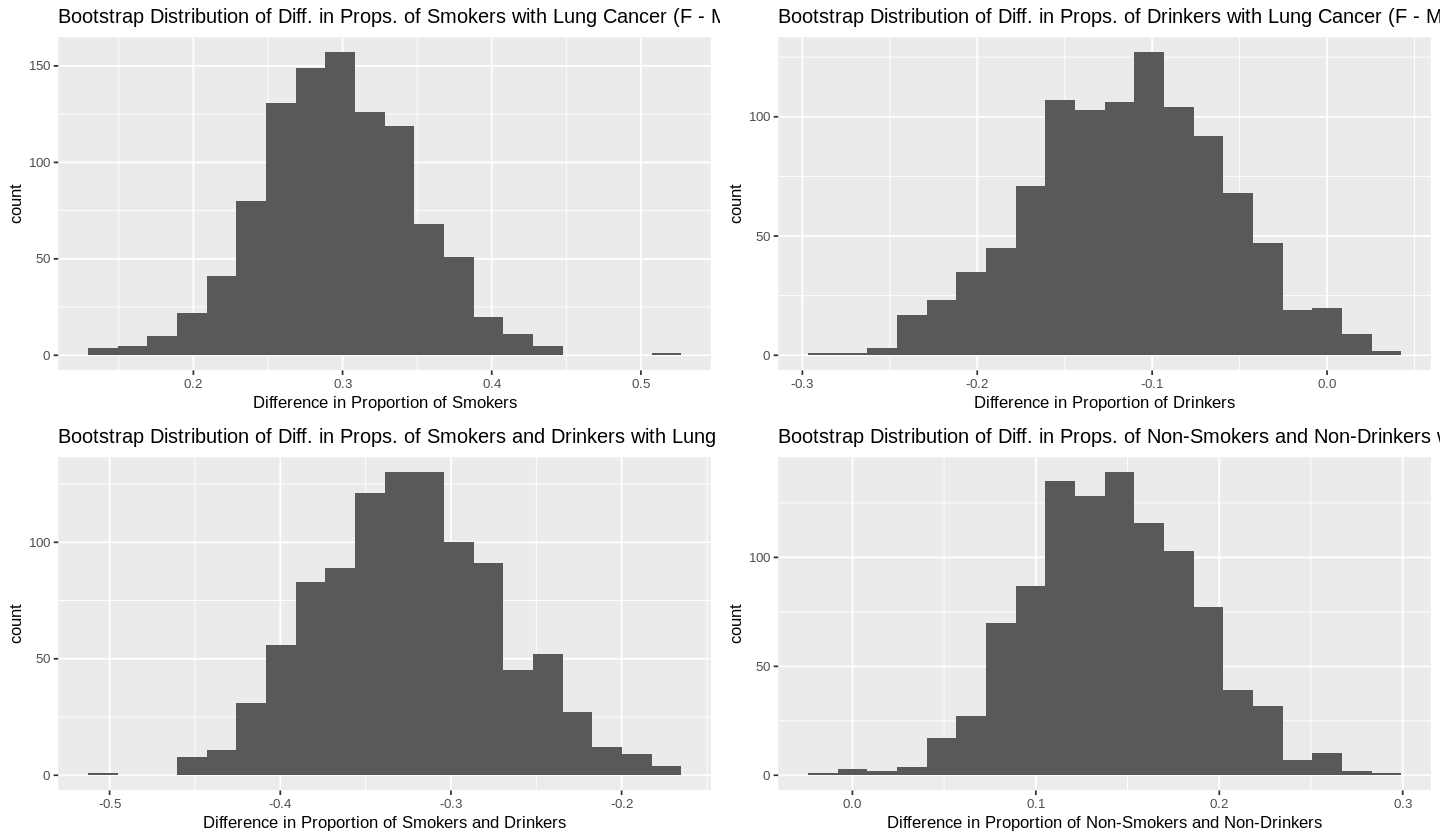

In [8]:
# Increase size of plots
options(repr.plot.width = 12, repr.plot.height = 7)

# Plot the bootstrap distribution of the smokers only group
bootstrap_survey_smoking_plot <- bootstrap_survey_smoking %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Smokers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Smokers with Lung Cancer (F - M)") +
        theme(text = element_text(size = 10))

# Plot the bootstrap distribution of the drinkers only group
bootstrap_survey_alcohol_consuming_plot <- bootstrap_survey_alcohol_consuming %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Drinkers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Drinkers with Lung Cancer (F - M)") +
        theme(text = element_text(size = 10))

# Plot the bootstrap distribution of the smokers and drinkers group
bootstrap_survey_both_plot <- bootstrap_survey_both %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Smokers and Drinkers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Smokers and Drinkers with Lung Cancer (F - M)") +
        theme(text = element_text(size = 10))

# Plot the bootstrap distribution of the non-smokers and non-drinkers group
bootstrap_survey_none_plot <- bootstrap_survey_none %>%
    ggplot(aes(x = stat)) +
        geom_histogram(bins = 20) +
        labs(x = "Difference in Proportion of Non-Smokers and Non-Drinkers") +
        ggtitle("Bootstrap Distribution of Diff. in Props. of Non-Smokers and Non-Drinkers with Lung Cancer (F - M)") +
        theme(text = element_text(size = 10))

grid.arrange(bootstrap_survey_smoking_plot,
             bootstrap_survey_alcohol_consuming_plot,
             bootstrap_survey_both_plot,
             bootstrap_survey_none_plot,
             ncol = 2)

The results in female block and male block are showing clearly opposing result, thus it is impossible to determine anything from preliminary results. Further investigation is required to decide which one of smoking and drinking affects more.

### Method

The blocking and hypothesis tests are used in this project. The blocking factor that we use is gender, which clearly separates the difference between males and females. Hypothesis tests can give us a reason to show the relationship between smoking, alcohol and lung cancer. Confidence intervals can give people a detailed percentage of the relationship between smoking, alcohol intake and their harm to lung cancer. We expect that the relationship between smoking and lung cancer will be stronger than the relationship between alcohol and lung cancer. Additionally, both will be positive relationships. This result we expect to find can help people familiarize themselves with the harm of smoking and its relationship with lung cancer. It will also give people insight into the probability of lung cancer due to smoking or alcohol. However, in this project we only discuss two factors (smoking and alcohol), so further questions regarding other factors such as anxiety and peer pressure can be discussed in the future.


### Reference
Hydes, T.J., Burton, R., Inskip, H., et al. (2019) A comparison of gender-linked population cancer risks between alcohol and tobacco: how many cigarettes are there in a bottle of wine?. BMC Public Health 19, 316. https://doi.org/10.1186/s12889-019-6576-9
 
Brenner, D. R., Fehringer, G., Zhang, Z., et al. (2019;2018;). Alcohol consumption and lung cancer risk: A pooled analysis from the international lung cancer consortium and the SYNERGY study. Cancer Epidemiology, 58, 25-32. https://doi.org/10.1016/j.canep.2018.10.006

